In [1]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
# Set Seaborn style for better visualization
sns.set(style='darkgrid')

In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names for better understanding of the output
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 186s 7us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 31s 7us/step


# Training SLP Model without Normalization

In [3]:
# Create a Simple Perceptron Model
model1 = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D array
    Dense(64, activation='relu'),  # First hidden layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model with SGD optimizer (instead of Adam)
model1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\Global\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1220 - loss: 275.4737 - val_accuracy: 0.1523 - val_loss: 2.1754
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1077 - loss: 2.2923 - val_accuracy: 0.1092 - val_loss: 2.2835
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1085 - loss: 2.2898 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0996 - loss: 2.3024 - val_accuracy: 0.1004 - val_loss: 2.3026
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0990 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0978 - loss: 2.3025 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0987 - loss: 2.3025 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0994 - loss: 2.3025 

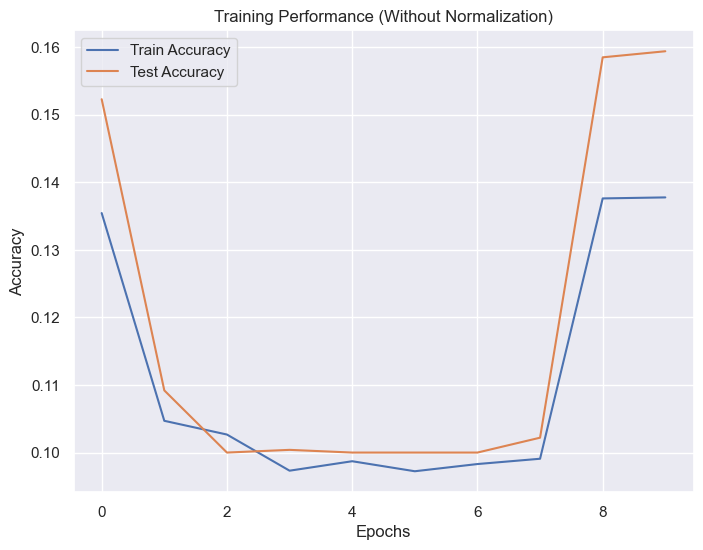

In [4]:
# Train the model
history1 = model1.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Performance (Without Normalization)')
plt.legend()
plt.show()

# Training SLP Model with Normalization

In [5]:
# Normalize the dataset (scale pixel values between 0 and 1)
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

In [6]:
# Create a Simple Perceptron Model with Normalization
model2 = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(64, activation='relu'),  
    Dense(10, activation='softmax')  
])

# Compile the model with RMSprop optimizer
model2.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history2 = model2.fit(train_images_norm, train_labels, epochs=10, validation_data=(test_images_norm, test_labels))

# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Performance (With Normalization)')
plt.legend()
plt.show()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7672 - loss: 0.6684 - val_accuracy: 0.8475 - val_loss: 0.4269
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8568 - loss: 0.3959 - val_accuracy: 0.8416 - val_loss: 0.4657
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8696 - loss: 0.3646 - val_accuracy: 0.8692 - val_loss: 0.3803
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8790 - loss: 0.3390 - val_accuracy: 0.8670 - val_loss: 0.3734
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8860 - loss: 0.3245 - val_accuracy: 0.8663 - val_loss: 0.3834
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8917 - loss: 0.3041 - val_accuracy: 0.8704 - val_loss: 0.3743
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8964 - loss: 0.2961 - val_accuracy: 0.8741 - val_loss: 0.3766
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8960 - loss: 0.2899 - 

In [ ]:
# Model Evaluation
loss1, acc1 = model1.evaluate(test_images, test_labels)
print(f'Without Normalization - Test Accuracy: {acc1 * 100:.2f}%')

loss2, acc2 = model2.evaluate(test_images_norm, test_labels)
print(f'With Normalization - Test Accuracy: {acc2 * 100:.2f}%')